<a href="https://colab.research.google.com/github/ARKushnir/Cookbook/blob/master/yaschool_sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
!mv _sqlite3.cpython-37m-x86_64-linux-gnu.so /usr/lib/python3.7/lib-dynload/
import os
os.kill(os.getpid(), 9)

Downloading...
From: https://drive.google.com/uc?id=1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
To: /content/_sqlite3.cpython-37m-x86_64-linux-gnu.so
6.23MB [00:00, 96.5MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import sqlite3

In [ ]:
sqlite3.sqlite_version

'3.34.1'

In [ ]:
con = sqlite3.connect('db')

In [ ]:
cur = con.cursor()

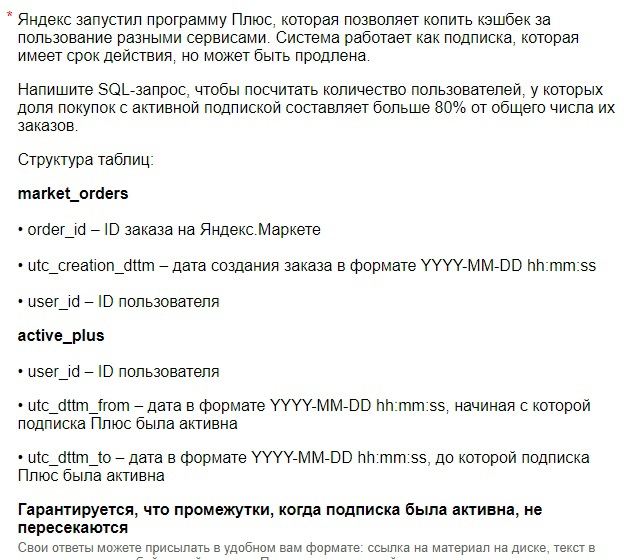

In [ ]:
4/5

0.8

In [ ]:
pd.date_range('2021-03-15','2021-03-19')

DatetimeIndex(['2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
               '2021-03-19'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
market_orders_user1 = pd.DataFrame({'order_id':range(5),
                              'utc_creation_dttm':pd.date_range('2021-03-15','2021-03-19'),
                              'user_id':[1]*5})

In [ ]:
market_orders_user2 = pd.DataFrame({'order_id':[1,2,3,4,5,6,7,8,9,10],
                              'utc_creation_dttm':pd.date_range('2021-03-15','2021-03-24'),
                              'user_id':[2]*10})

In [ ]:
market_orders_user3 = pd.DataFrame({'order_id':range(5),
                              'utc_creation_dttm':pd.date_range('2021-03-15','2021-03-19'),
                              'user_id':[3]*5})

In [ ]:
market_orders = pd.concat([market_orders_user1,market_orders_user2,market_orders_user3])

In [ ]:
market_orders

,order_id,utc_creation_dttm,user_id
0,0,2021-03-15,1
1,1,2021-03-16,1
2,2,2021-03-17,1
3,3,2021-03-18,1
4,4,2021-03-19,1
0,1,2021-03-15,2
1,2,2021-03-16,2
2,3,2021-03-17,2
3,4,2021-03-18,2
4,5,2021-03-19,2


In [ ]:
active_plus_user1 = pd.DataFrame({'user_id':[1],
                            'utc_dttm_from':['2021-03-15'],
                            'utc_dttm_to':['2021-03-18']})

In [ ]:
active_plus_user2 = pd.DataFrame({'user_id':[2,2,2],
                            'utc_dttm_from':['2021-03-15','2021-03-18','2021-03-24'],
                            'utc_dttm_to':['2021-03-16','2021-03-22','2021-04-16']})

In [ ]:
active_plus_user3 = pd.DataFrame({'user_id':[3],
                            'utc_dttm_from':['2021-03-15'],
                            'utc_dttm_to':['2021-03-16']})

In [ ]:
 active_plus = pd.concat([active_plus_user1,active_plus_user2,active_plus_user3])

In [ ]:
active_plus

,user_id,utc_dttm_from,utc_dttm_to
0,1,2021-03-15,2021-03-18
0,2,2021-03-15,2021-03-16
1,2,2021-03-18,2021-03-22
2,2,2021-03-24,2021-04-16
0,3,2021-03-15,2021-03-16


In [ ]:
market_orders.to_sql('market_orders',con,index=False,if_exists='replace')
active_plus.to_sql('active_plus',con,index=False,if_exists='replace')

In [ ]:
sql = '''select * from market_orders t'''

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

In [ ]:
select(sql)

,order_id,utc_creation_dttm,user_id
0,0,2021-03-15 00:00:00,1
1,1,2021-03-16 00:00:00,1
2,2,2021-03-17 00:00:00,1
3,3,2021-03-18 00:00:00,1
4,4,2021-03-19 00:00:00,1
5,1,2021-03-15 00:00:00,2
6,2,2021-03-16 00:00:00,2
7,3,2021-03-17 00:00:00,2
8,4,2021-03-18 00:00:00,2
9,5,2021-03-19 00:00:00,2


In [ ]:
sql = '''
with users_active_plus as (
select t.user_id, 

avg(case when ap.user_id is not null then 1 else 0 end) as active_plus

from market_orders t
left join active_plus ap on
t.user_id = ap.user_id and
date(t.utc_creation_dttm) between date(ap.utc_dttm_from) and date(ap.utc_dttm_to)
group by t.user_id
having avg(case when ap.user_id is not null then 1 else 0 end) >= 0.8)

select count(1) from users_active_plus t

'''

In [ ]:
select(sql)

,count(1)
0,2
